In [77]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [78]:
df=pd.read_csv('Fraud loan Predication.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [79]:
df.info

<bound method DataFrame.info of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849          

In [80]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [81]:
df.shape

(614, 13)

In [82]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [83]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

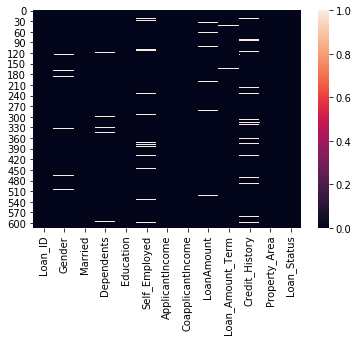

In [84]:
sns.heatmap(df.isnull())

In [85]:
#Check if there are any null values in dataset
df.isnull().values.any()

True

In [86]:
df['LoanAmount']=df['LoanAmount'].fillna((df['LoanAmount'].mean()))
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna((df['Loan_Amount_Term'].mean()))
df['Credit_History']=df['Credit_History'].fillna((df['Credit_History'].mean()))
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [87]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='most_frequent')
df['Gender']=imp.fit_transform(df['Gender'].values.reshape(-1,1))
imp=SimpleImputer(strategy='most_frequent')
df['Married']=imp.fit_transform(df['Married'].values.reshape(-1,1))
imp=SimpleImputer(strategy='most_frequent')
df['Dependents']=imp.fit_transform(df['Dependents'].values.reshape(-1,1))
imp=SimpleImputer(strategy='most_frequent')
df['Self_Employed']=imp.fit_transform(df['Self_Employed'].values.reshape(-1,1))
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [88]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [89]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,146.412162,84.037468,9.0,100.25,129.0,164.75,700.0
Loan_Amount_Term,614.0,342.000000,64.372489,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.842199,0.349681,0.0,1.00,1.0,1.00,1.0


In [90]:
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['Married']=le.fit_transform(df['Married'])
df['Education']=le.fit_transform(df['Education'])
df['Self_Employed']=le.fit_transform(df['Self_Employed'])
df['Property_Area']=le.fit_transform(df['Property_Area'])
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

In [91]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0


In [92]:
df.drop(columns=['Loan_ID','Married','Dependents'],axis=1,inplace=True)
df.head(2)

,Gender,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0


In [93]:
df.corr()

,Gender,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.012819,-0.025752,0.017987
Education,0.045364,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,-0.000525,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.002260,-0.030860,-0.003700
ApplicantIncome,0.058809,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.082912,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.107930,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.073567,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974
Credit_History,0.012819,-0.077936,-0.002260,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.001880,0.540483
Property_Area,-0.025752,-0.065243,-0.030860,-0.009500,0.010522,-0.044776,-0.077620,-0.001880,1.000000,0.032112
Loan_Status,0.017987,-0.085884,-0.003700,-0.004710,-0.059187,-0.036416,-0.020974,0.540483,0.032112,1.000000


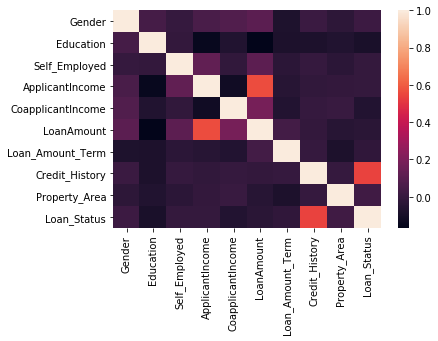

In [94]:
sns.heatmap(df.corr())

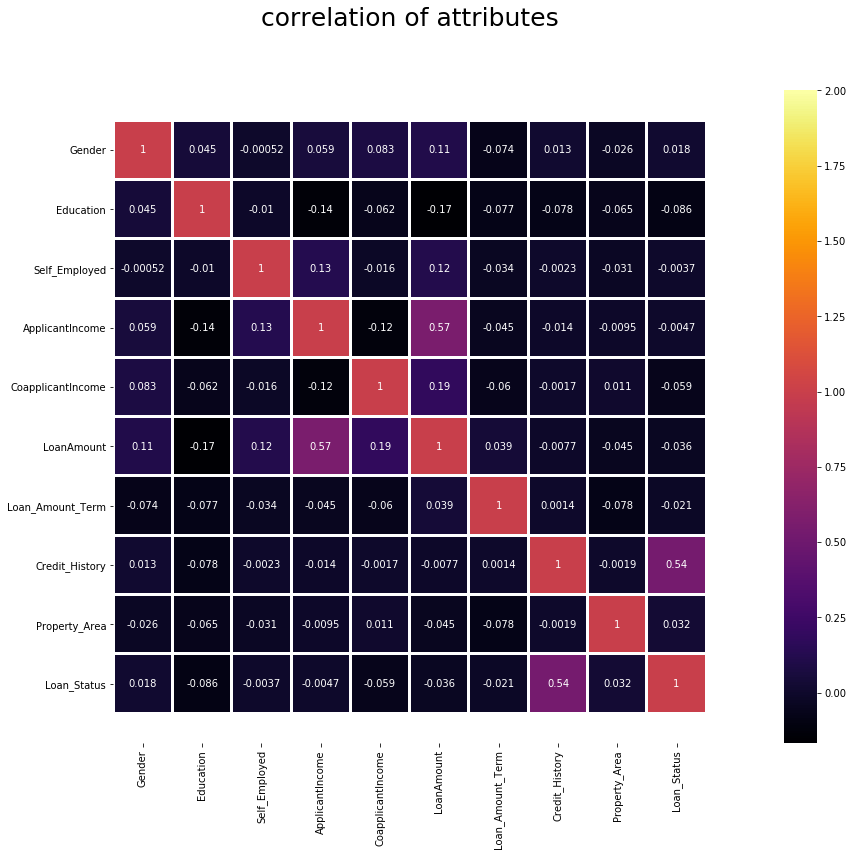

In [95]:
# Heat map represents of correlation between the various attributes
colormap=plt.cm.inferno # color range to be used in heat map
plt.figure(figsize=(28,12))
plt.title('correlation of attributes',y=1.09, size=25)
sns.heatmap(df.corr(),linewidths=2,vmax=2,square=True,cmap=colormap,linecolor='white',annot=True)

# snippet to overcome the top and bottom row breaking cells(matplotlib version specfic issue)
b,t = plt.ylim()# discover the values for button and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # subtract 0.5 from the top
plt.ylim(b,t)# update the ylim(bottom,top)values
plt.show()

In [96]:
import warnings
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
warnings.filterwarnings('ignore')
Loan_Eligibilty = df[(df['Loan_Status'] != 0)]
Loan_not_Eligibilty = df[(df['Loan_Status'] == 0)]

#------------COUNT-----------------------
trace = go.Bar(x = (len(Loan_not_Eligibilty), len(Loan_Eligibilty)), y = ['Loan_Eligibilty', 'Loan_not_Eligibilty'], orientation = 'h', opacity = 0.8,marker=dict(
        color=['gold', 'lightskyblue'],
        line=dict(color='#000000',width=1.5)))

layout = dict(title =  'Count of Loan_Status variable')
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

#------------PERCENTAGE-------------------
trace = go.Pie(labels = ['Loan_not_Eligibilty', 'Loan_Eligibilty'], values = df['Loan_Status'].value_counts(), 
               textfont=dict(size=15),opacity = 0.8, 
               marker=dict(colors=['lightskyblue','gold'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of Loan_Status variable')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

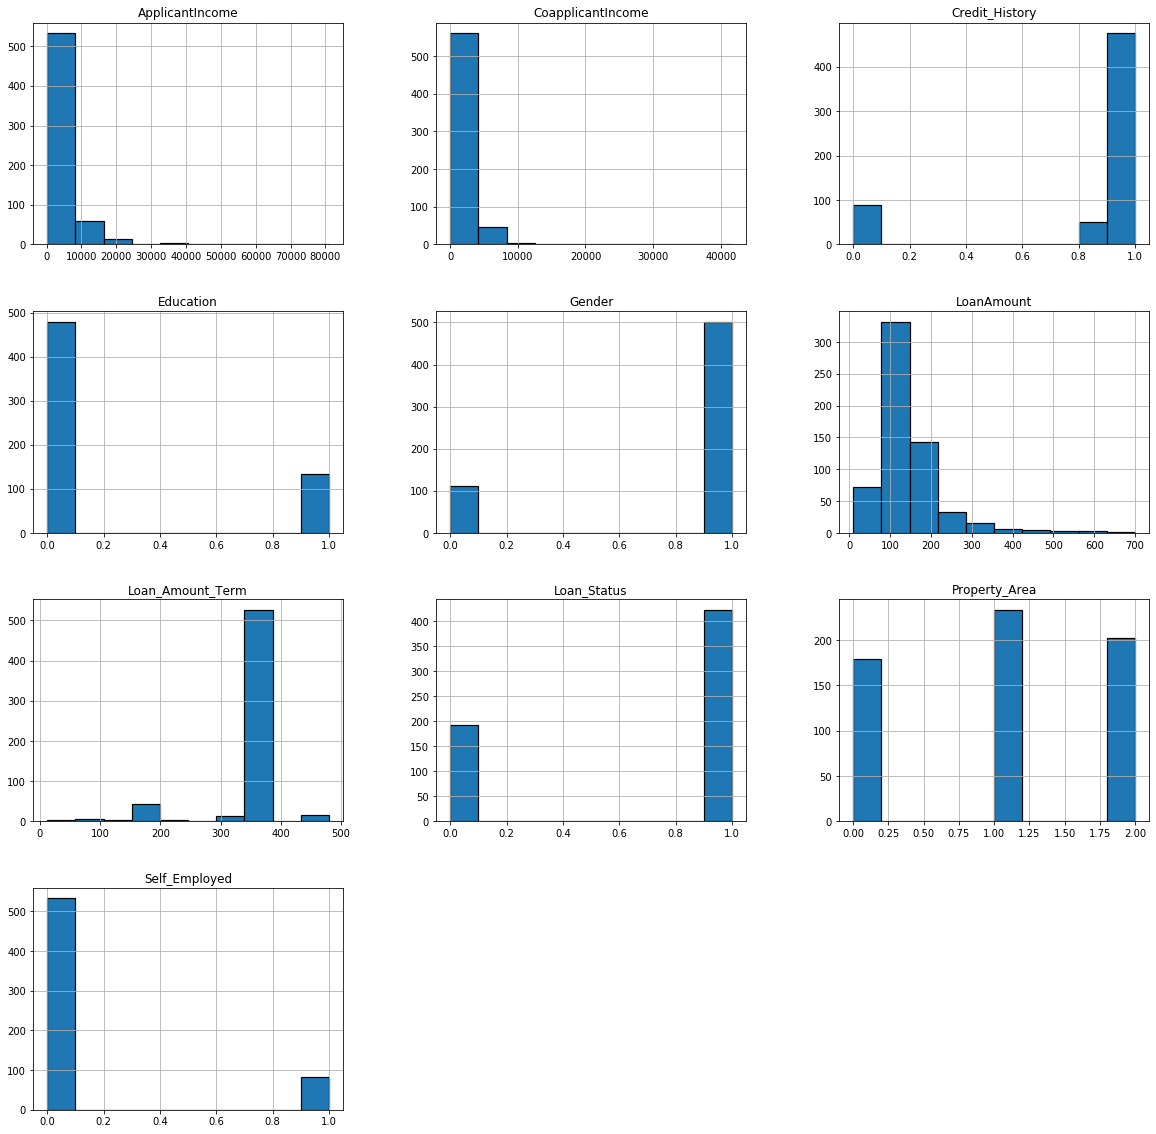

In [97]:
# Visulazing the distibution of the data for every feature
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

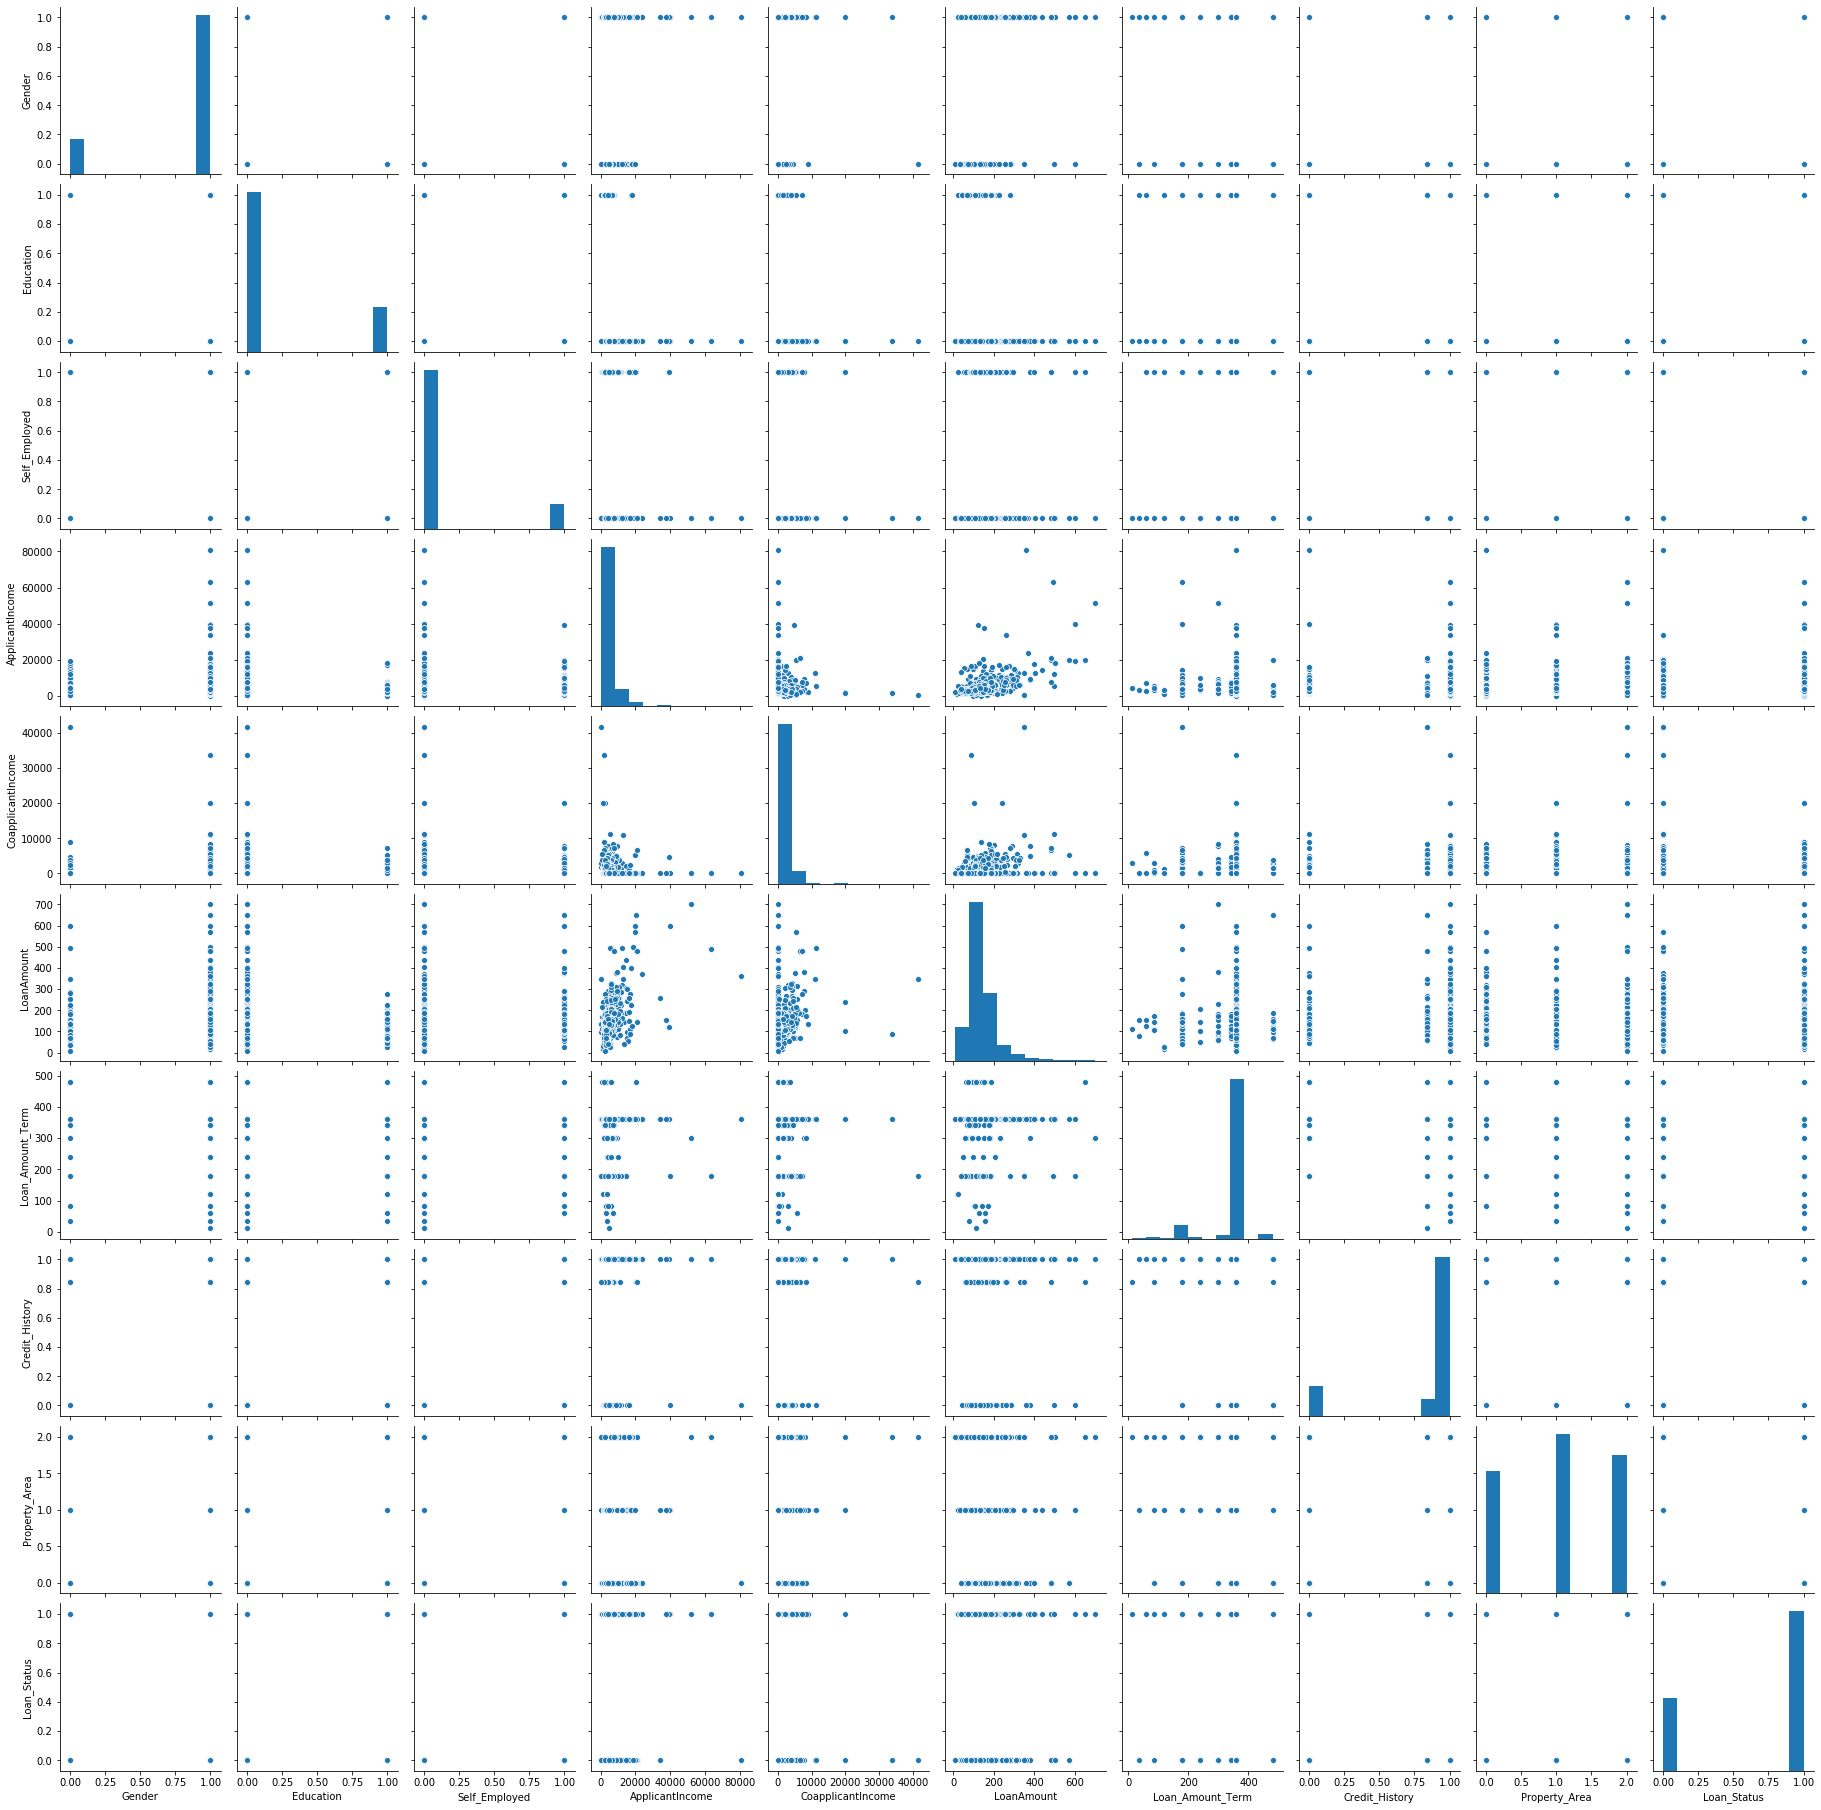

In [98]:
# Lets the check the Multi variant analysis of the Numerical Variables
import seaborn as sns
sns.pairplot(df)
plt.show()

In [102]:
df.head(2)


,Gender,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0


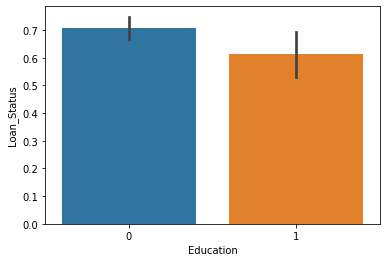

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x='Education',y="Loan_Status",data=df)

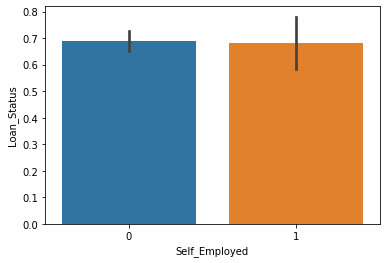

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x='Self_Employed',y="Loan_Status",data=df)

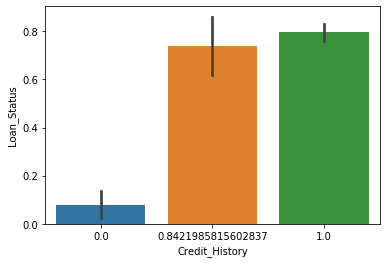

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x='Credit_History',y="Loan_Status",data=df)

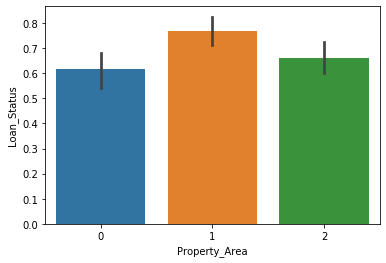

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x='Property_Area',y="Loan_Status",data=df)

In [109]:
# Lets check for Outliers
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df_final=df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(614, 10)
(577, 10)


In [110]:
# Sepearting target and input variables
import numpy as np
x=df_final.drop(columns=['Loan_Status'])
y=df_final[["Loan_Status"]]

In [111]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=55,test_size=0.20)

In [112]:
#print the shape of the train and test data values
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(461, 9)
(461, 1)
(116, 9)
(116, 1)


In [113]:
mnb=MultinomialNB()
mnb.fit(train_x,train_y)
mnb.score(train_x,train_y)
predmnb=mnb.predict(test_x)
print(accuracy_score(test_y,predmnb))
print(confusion_matrix(test_y,predmnb))
print(classification_report(test_y,predmnb))

0.4482758620689655
[[17 18]
 [46 35]]
              precision    recall  f1-score   support

           0       0.27      0.49      0.35        35
           1       0.66      0.43      0.52        81

    accuracy                           0.45       116
   macro avg       0.47      0.46      0.43       116
weighted avg       0.54      0.45      0.47       116



In [114]:
svc=SVC(kernel='rbf')
svc.fit(train_x,train_y)
svc.score(train_x,train_y)
predsvc=svc.predict(test_x)
print(accuracy_score(test_y,predsvc))
print(confusion_matrix(test_y,predsvc))
print(classification_report(test_y,predsvc))

0.6982758620689655
[[ 0 35]
 [ 0 81]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.70      1.00      0.82        81

    accuracy                           0.70       116
   macro avg       0.35      0.50      0.41       116
weighted avg       0.49      0.70      0.57       116



In [115]:
dtc=DecisionTreeClassifier()
dtc.fit(train_x,train_y)
dtc.score(train_x,train_y)
predsvc=dtc.predict(test_x)
print(accuracy_score(test_y,predsvc))
print(confusion_matrix(test_y,predsvc))
print(classification_report(test_y,predsvc))

0.7586206896551724
[[23 12]
 [16 65]]
              precision    recall  f1-score   support

           0       0.59      0.66      0.62        35
           1       0.84      0.80      0.82        81

    accuracy                           0.76       116
   macro avg       0.72      0.73      0.72       116
weighted avg       0.77      0.76      0.76       116



In [116]:
svc=KNeighborsClassifier()
svc.fit(train_x,train_y)
svc.score(train_x,train_y)
predsvc=svc.predict(test_x)
print(accuracy_score(test_y,predsvc))
print(confusion_matrix(test_y,predsvc))
print(classification_report(test_y,predsvc))

0.603448275862069
[[ 8 27]
 [19 62]]
              precision    recall  f1-score   support

           0       0.30      0.23      0.26        35
           1       0.70      0.77      0.73        81

    accuracy                           0.60       116
   macro avg       0.50      0.50      0.49       116
weighted avg       0.58      0.60      0.59       116



In [117]:
svc=SVC(kernel='poly')
svc.fit(train_x,train_y)
svc.score(train_x,train_y)
predsvc=svc.predict(test_x)
print(accuracy_score(test_y,predsvc))
print(confusion_matrix(test_y,predsvc))
print(classification_report(test_y,predsvc))

0.6982758620689655
[[ 0 35]
 [ 0 81]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.70      1.00      0.82        81

    accuracy                           0.70       116
   macro avg       0.35      0.50      0.41       116
weighted avg       0.49      0.70      0.57       116



In [118]:
svc=SVC(kernel='poly')
svc.fit(train_x,train_y)
svc.score(train_x,train_y)
predsvc=svc.predict(test_x)
print(accuracy_score(test_y,predsvc))
print(confusion_matrix(test_y,predsvc))
print(classification_report(test_y,predsvc))

0.6982758620689655
[[ 0 35]
 [ 0 81]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.70      1.00      0.82        81

    accuracy                           0.70       116
   macro avg       0.35      0.50      0.41       116
weighted avg       0.49      0.70      0.57       116



In [120]:
def svmkernel(ker):
    svc=SVC(kernel='poly')
    svc.fit(train_x,train_y)
    svc.score(train_x,train_y)
    predsvc=svc.predict(test_x)
    print(accuracy_score(test_y,predsvc))
    print(confusion_matrix(test_y,predsvc))
    print(classification_report(test_y,predsvc))

In [121]:
svmkernel('rbf')

0.6982758620689655
[[ 0 35]
 [ 0 81]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.70      1.00      0.82        81

    accuracy                           0.70       116
   macro avg       0.35      0.50      0.41       116
weighted avg       0.49      0.70      0.57       116



In [122]:
svmkernel('poly')

0.6982758620689655
[[ 0 35]
 [ 0 81]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.70      1.00      0.82        81

    accuracy                           0.70       116
   macro avg       0.35      0.50      0.41       116
weighted avg       0.49      0.70      0.57       116



In [123]:
df1=pd.DataFrame(predsvc)
df1.to_csv('svc_predicition.csv')

In [124]:
from sklearn.model_selection import cross_val_score
mnb=MultinomialNB()

score=cross_val_score(mnb,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.56896552 0.49137931 0.55652174 0.46956522 0.53043478]
0.5233733133433283
0.037805446577129025


In [125]:
sv=SVC()
score=cross_val_score(mnb,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.56896552 0.49137931 0.55652174 0.46956522 0.53043478]
0.5233733133433283
0.037805446577129025


In [126]:
from sklearn import svm,datasets
from sklearn.model_selection import GridSearchCV
iris=datasets.load_iris()
parameters={'kernel':('linear','rbf'),'C':[1,10]}
svc=svm.SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(iris.data,iris.target)

print(clf.best_score_)
print(clf.best_estimator_.kernel)
print(clf.best_params_)

0.9800000000000001
linear
{'C': 1, 'kernel': 'linear'}


In [127]:
from sklearn import svm,datasets
from sklearn.model_selection import GridSearchCV
iris=datasets.load_iris()
parameters={'kernel':('linear','rbf'),'C':[1,10]}
svc=svm.SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(iris.data,iris.target)

sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [128]:
print(clf.best_params_)

{'C': 1, 'kernel': 'linear'}


In [129]:
model=[DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),MultinomialNB()]


for m in model:
    m.fit(train_x,train_y)
    predm=m.predict(test_x)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(test_y,predm))
    print(confusion_matrix(test_y,predm))
    print(classification_report(test_y,predm))
    print('\n')

Accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is:
0.7672413793103449
[[22 13]
 [14 67]]
              precision    recall  f1-score   support

           0       0.61      0.63      0.62        35
           1       0.84      0.83      0.83        81

    accuracy                           0.77       116
   macro avg       0.72      0.73      0.73       116
weighted avg       0.77      0.77      0.77       116



Accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, 

In [130]:
import pickle
filename='pickledtcfile.pkl'
pickle.dump(dtc,open(filename,'wb'))
# Load the model from the disk
loaded_model=pickle.load(open(filename,'rb'))
loaded_model.predict(test_x)

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0])